In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [2]:
'''cell only for reading time labels'''
from toolbox.methods import read_data
all_epochs, all_rawdata = read_data(amount_of_subjects=1,task='main',resample=True,resample_frequency=50)
time_labels = all_epochs[0].times
print(time_labels.shape)

Frequency before: 500.0
Frequency after: 50.0
(288,)


In [3]:
'''Variables'''
sigma = 5
timepoints = time_labels.shape[0]

In [4]:

df_deci = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_deci_rf/timepoint_decision_weightless_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint]})
df_deci = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

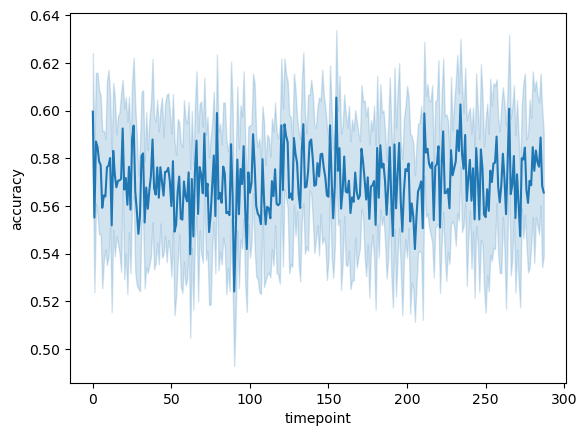

In [5]:
sns.lineplot(x="timepoint", y="accuracy", data=df_deci)

In [6]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_resp_rf/timepoint_response_weightless_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint]})
df_resp = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

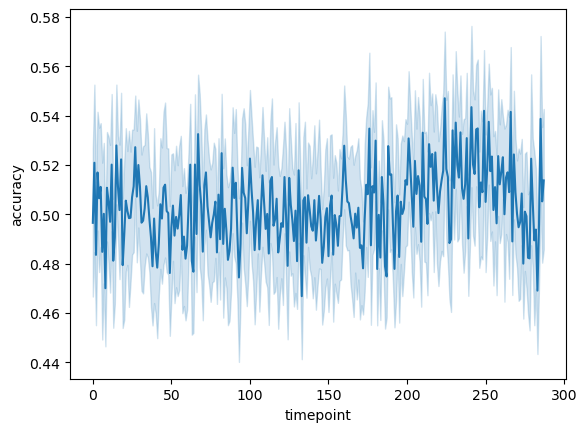

In [7]:
sns.lineplot(x="timepoint", y="accuracy", data=df_resp, 
             # err_style="bars", errorbar=('ci', 95)
             )

In [8]:
df_deci = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_deci_rf/timepoint_decision_weightless_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'No'})
data = np.load('results_deci_rf/timepoint_decision_shuffled_0.npy', allow_pickle=True)
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'Yes'})
df_deci_shuffled = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

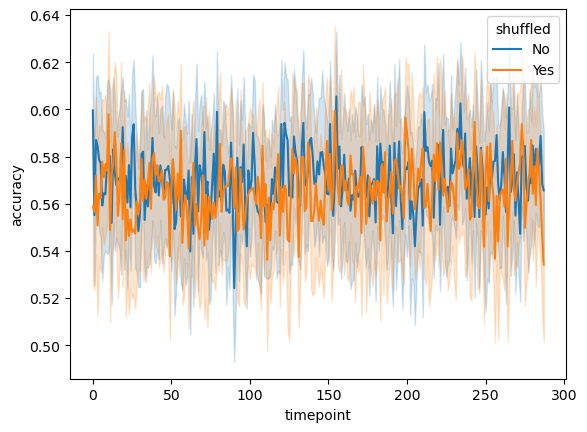

In [9]:
sns.lineplot(x="timepoint", y="accuracy", data=df_deci_shuffled, hue='shuffled')

In [10]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_resp_rf/timepoint_response_weightless_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'No'})
data = np.load('results_resp_rf/timepoint_response_shuffled_0.npy', allow_pickle=True)
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint], 'shuffled': 'Yes'})
df_resp_shuffled = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

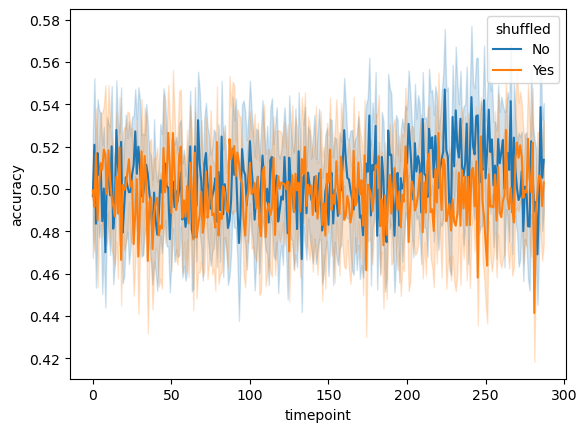

In [11]:
sns.lineplot(x="timepoint", y="accuracy", data=df_resp_shuffled, hue='shuffled')